# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | stribro
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | tanout
Processing Record 8 of Set 1 | west bay
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 11 of Set 1 | udachny
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | solnechnyy
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | al jawf
Processing Record 16 of Set 1 | codrington
Processing Record 17 of Set 1 | kapa'a
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | pitimbu
Processing Record 20 of Set 1 | roma
Processing Record 21 of Set 1 | zhigalovo
Processing Record 22 o

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,14.25,58,75,2.06,CL,1706008627
1,stribro,49.7529,13.0041,6.03,100,99,7.11,CZ,1706008629
2,blackmans bay,-43.0167,147.3167,15.07,85,93,0.58,AU,1706008630
3,port-aux-francais,-49.3500,70.2167,7.83,98,100,8.77,TF,1706008631
4,waitangi,-43.9535,-176.5597,17.68,99,99,2.24,NZ,1706008632


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,14.25,58,75,2.06,CL,1706008627
1,stribro,49.7529,13.0041,6.03,100,99,7.11,CZ,1706008629
2,blackmans bay,-43.0167,147.3167,15.07,85,93,0.58,AU,1706008630
3,port-aux-francais,-49.3500,70.2167,7.83,98,100,8.77,TF,1706008631
4,waitangi,-43.9535,-176.5597,17.68,99,99,2.24,NZ,1706008632


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

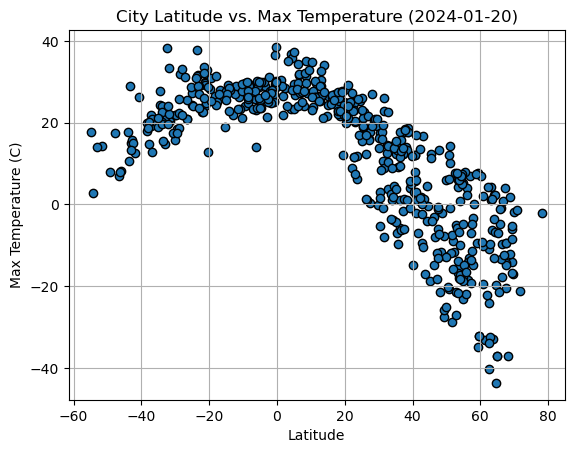

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-01-20)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

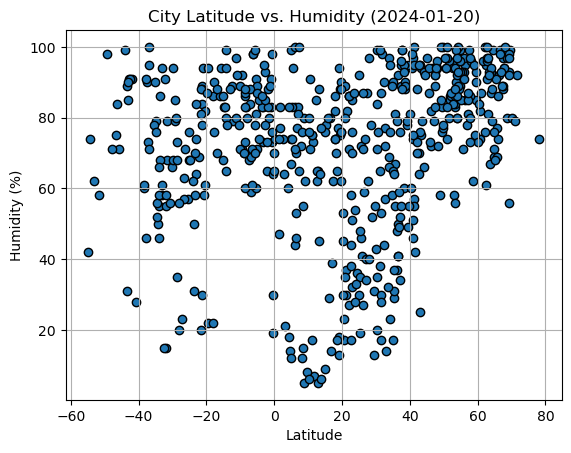

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-01-20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

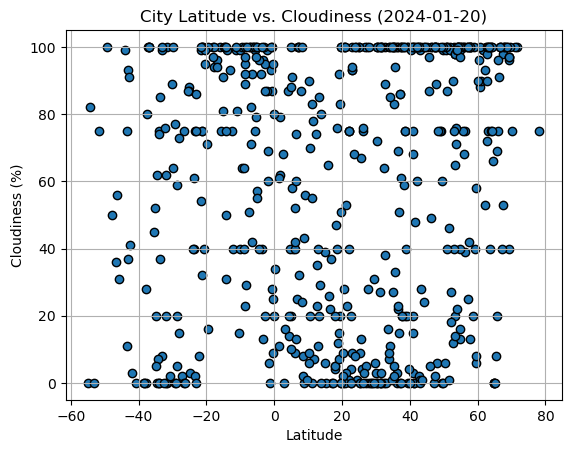

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-01-20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

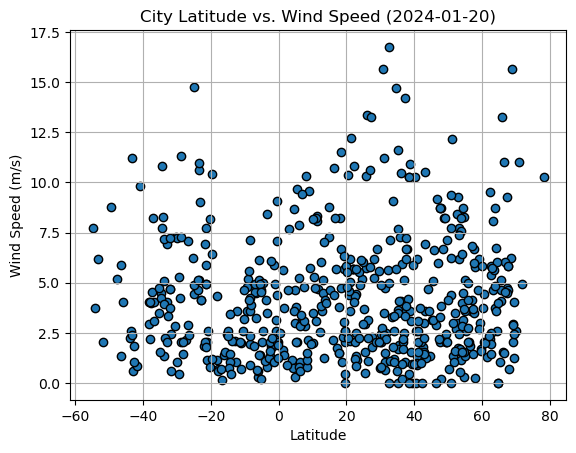

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-01-20)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [92]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")

    plt.plot(x_values,regress_values,"r-")
    print(f"The r-value is: {rvalue}")
 


In [93]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,stribro,49.7529,13.0041,6.03,100,99,7.11,CZ,1706008629
6,tanout,14.9709,8.8879,26.42,9,39,7.29,NE,1706008634
7,west bay,19.3667,-81.4167,25.04,88,20,5.66,KY,1706008635
9,udachny,66.4167,112.4000,-9.75,92,91,11.02,RU,1706008637
10,ilulissat,69.2167,-51.1000,-13.99,56,40,2.06,GL,1706008638


In [94]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,14.25,58,75,2.06,CL,1706008627
2,blackmans bay,-43.0167,147.3167,15.07,85,93,0.58,AU,1706008630
3,port-aux-francais,-49.3500,70.2167,7.83,98,100,8.77,TF,1706008631
4,waitangi,-43.9535,-176.5597,17.68,99,99,2.24,NZ,1706008632
5,puerto ayora,-0.7393,-90.3518,25.31,98,87,2.61,EC,1706008632


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8346860574024305


Text(0, 0.5, 'Max Temp')

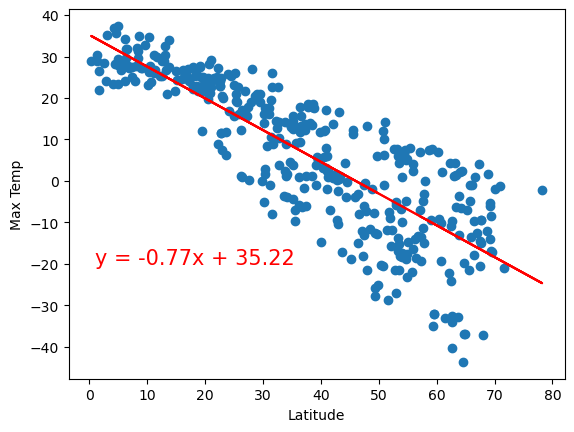

In [95]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Max Temp", (1,-20))

plt.xlabel('Latitude')
plt.ylabel('Max Temp')



The r-value is: 0.6294428400354742


Text(0, 0.5, 'Max Temp')

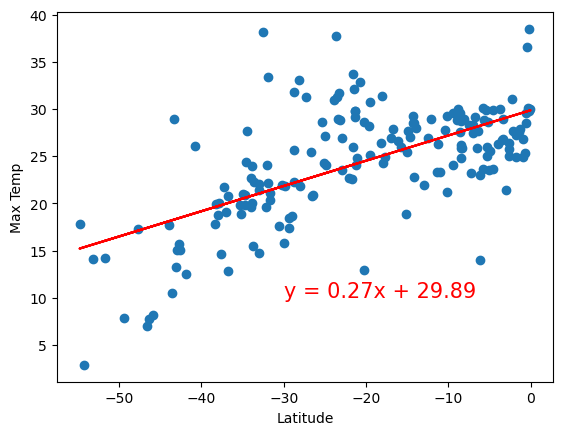

In [96]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Max Temp", (-30,10))

plt.xlabel('Latitude')
plt.ylabel('Max Temp')

**Discussion about the linear relationship:** 

For Northern Hemisphere, there is a negative linear relationship between Latitude and Max Temperature. This is because the r value is less than 1. 

For Southern Hemisphere, there is a positive linear relationship between Latitude and Max Temperature. This is because the r value is greater than 1. 

The extent of the relationship depends on the r value. The closer the r value to 1, the stronger the positive relationship. The closer the r value to -1, the stronger the negative relationship. When r value is close to 0, which means the relationship is weak. 


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4704283059851234


Text(0, 0.5, 'Humidity')

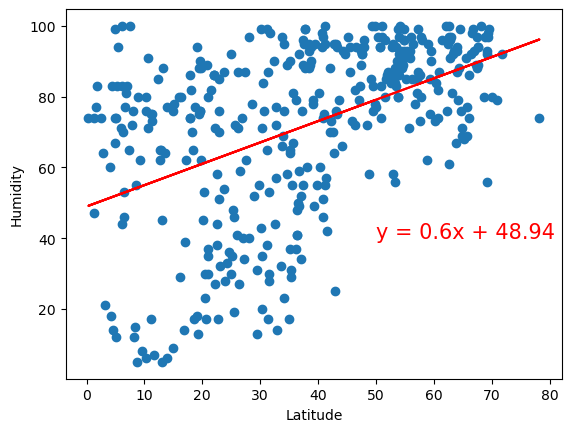

In [76]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Humidity", (50,40))

plt.xlabel('Latitude')
plt.ylabel('Humidity')

The r-value is: 0.19549555082143918


Text(0, 0.5, 'Humidity')

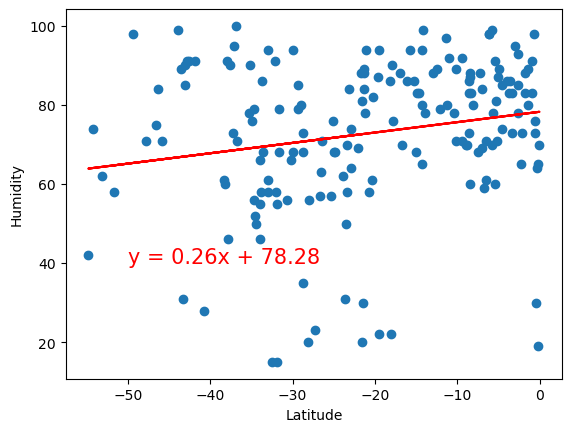

In [78]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Humidity", (-50,40))

plt.xlabel('Latitude')
plt.ylabel('Humidity')

**Discussion about the linear relationship:** 

For both Northern Hemisphere and Southern Hemisphere, there is a positive linear relationship between Latitude and Humidity. This is because the r value is greater than 1. 

The extent of the relationship depends on the r value. The closer the r value to 1, the stronger the positive relationship. When r value is close to 0, which means the relationship is weak. 


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3310918751833111


Text(0, 0.5, 'Cloudiness')

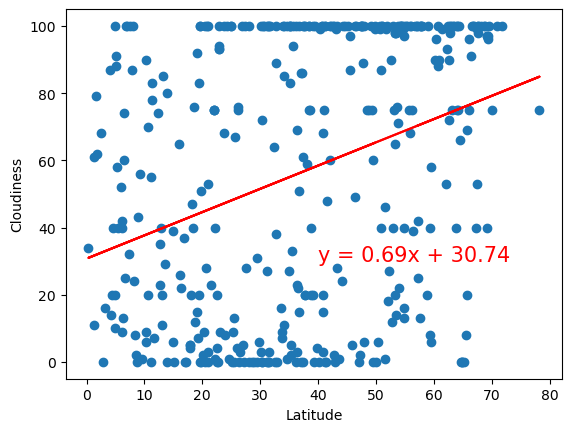

In [80]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Cloudiness", (40,30))

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

The r-value is: 0.29958993928661803


Text(0, 0.5, 'Cloudiness')

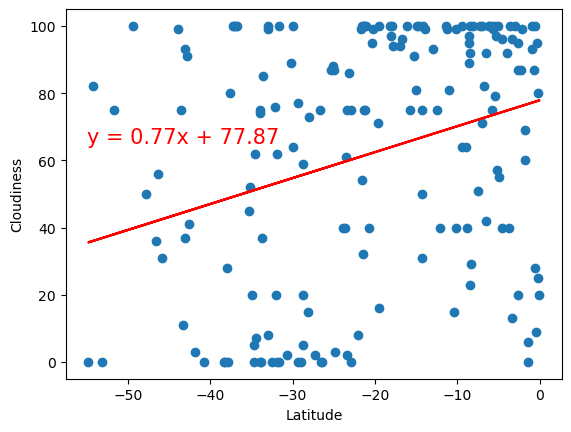

In [87]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Cloudiness", (-55,65))

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

**Discussion about the linear relationship:** 

For both Northern Hemisphere and Southern Hemisphere, there is a positive linear relationship between Latitude and Cloudiness. This is because the r value is greater than 1. 

The extent of the relationship depends on the r value. The closer the r value to 1, the stronger the positive relationship. When r value is close to 0, which means the relationship is weak. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.015055496882216567


Text(0, 0.5, 'Wind Speed')

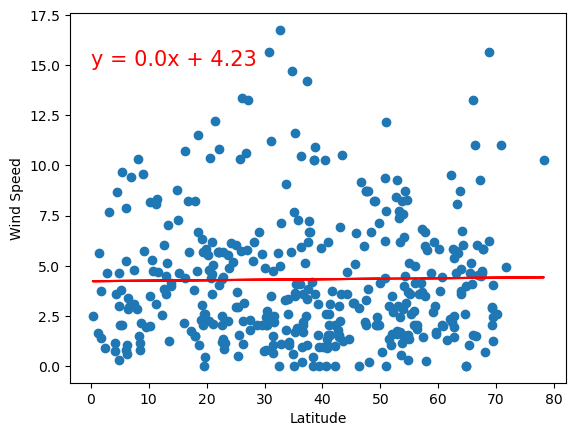

In [89]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Wind Speed"].astype("float")

plot_linear_regression(x_values, y_values, "Wind Speed", (0,15))

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

The r-value is: -0.2132511377443034


Text(0, 0.5, 'Wind Speed')

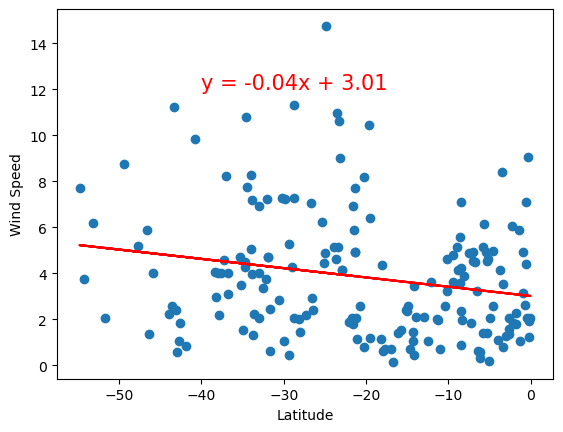

In [91]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Wind Speed"].astype("float")

plot_linear_regression(x_values, y_values, "Wind Speed", (-40,12))

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

**Discussion about the linear relationship:** 

For Northern Hemisphere, there is a positive linear relationship between Latitude and Wind Speed. This is because the r value is greater than 1. 

For Southern Hemisphere, there is a negative linear relationship between Latitude and Wind Speed. This is because the r value is less than 1. 

The extent of the relationship depends on the r value. The closer the r value to 1, the stronger the positive relationship. The closer the r value to -1, the stronger the negative relationship. When r value is close to 0, which means the relationship is weak. 